<a href="https://colab.research.google.com/github/adelic-matf/MM/blob/main/Prati_vodju.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modeliranje saobraćaja -mikroskopski model

Mikroskopski modeli saobraćaja opisuju svako vozilo pojedinačno i dinamiku njegove interakcije sa ostalim vozilima.

### Jednostavan model - prati vođu

Zamislimo dugačku traku puta na kojoj se kreću vozila jedno iza drugog. Jednostavnosti radi, pretpostavićemo da su sva vozila iste dužine $l$. Numerišimo vozila i definišimo funkciju $x_j(t)$ koja nam kao vrednost daje poziciju vozila $j$ u trenutku $t$. Želimo da opišemo kako vozač reguliše brzinu i rastojanje svog vozila u odnosu na vozilo koje se nalazi ispred njega. Ovakvi modeli su poznati pod nazivom "modeli praćenja vozila" (car following models).

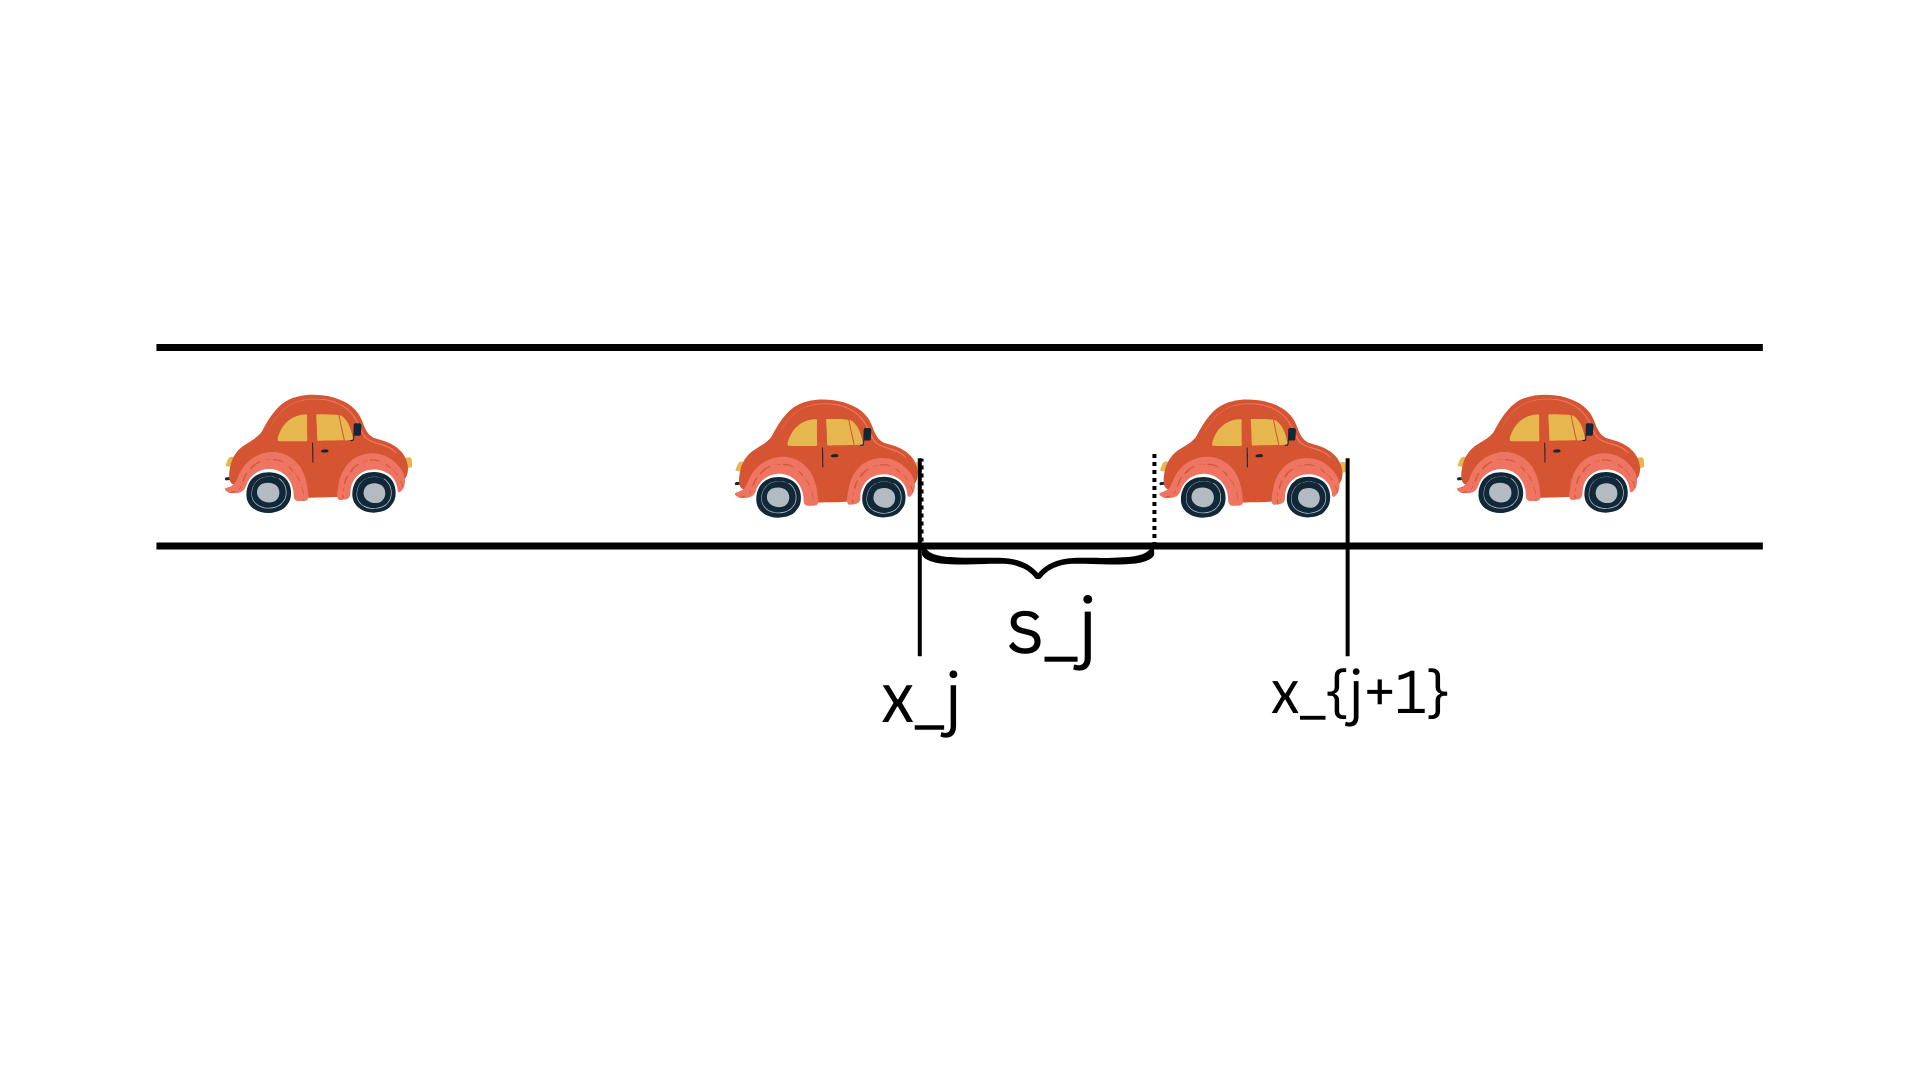

In [1]:

from IPython.display import Image
Image("https://raw.githubusercontent.com/adelic-matf/MM/main/slike/car.png", width=800)




Opšti oblik ovih dinamičkih modela se može zadati običnom diferencijalnom jednačinom drugog reda

$$ \ddot x_j(t)=F(s_j(t), \dot x_j(t), \dot x_{j+1}(t)),\quad t>0, \quad j=1,2,\dots ,N,$$

gde je:
- $s_j=x_{j+1}-x_{j}-l$ rastojenje između vozila
- $\dot x_j=dx_j/dt$ brzina vozila j
- $\ddot x_j=d^2x_j/dt^2$ ubrzanje vozala $j$
-  $F$ neka zadata funkcija.

Pretpostavljamo, naravno, da su nam poznata rastojanja i brzine u nekom početnom trenutku, koji možemo uzeti da je t=0:

$$
x_j(0) = x_{j0},\quad \dot x_j(0) = v_{j0}, \quad j=1,2,\dots, N.
$$

Jednostavniji model ovog tipa se zadaje jednačinom

$$
\ddot x_j= a \frac{\dot x_{j+1}-\dot x_j}{s_j^2}.
$$

Ovaj model je još poznat pod nazivom "prati vođu" (follow the leader).

Smisao modela je sledeći:
 ako je vozilo $j+1$ koje se nalazi ispred vozila $j$ brže od vozila $j$, tada će vozač u vozilu $j$ povećati brzinu, tj. njegovo ubrzanje će biti pozitivno, i obrnuto, ako je vozilo ispred sporije, vozač $j$ mora smanjiti ubrzanje. U model smo uključili **parametar $a$** koji će predstavljati koeficijent **prilagodljivost** vozača u vozilu $j$. Opet, uprostićemo model i pretpostaviti da su svi vozači jednako prilagodljivi. Dalje, ako su vozila jako blizu jedno drugom, očekujemo  intenzivniju reakciju vozača (veće usporavanje) kako bi se smanjio rizik od sudara, što modeliramo kvadratom rastojanja $s_j^2$ u imeniocu. Ovaj imenilac ukazuje i na to da će vozač slabije reagovati ako je rastojanje od vozila koje se nalazi ispred veliko.

Jednačina modela je diferencijalna jednačina drugog reda, pa je možemo aproksimirati jednostavnom Ojlerovom metodom. Sa tim ciljem uvodimo smene
$u_j=x_j$ i $v_j=\dot x_j$ i jednačinu svodimo na sistem običnih diferencijalnih jednačina prvog reda (dinamički sistem):

$$
\dot u_j=v_j,
$$
$$
\dot v_j=\frac{a}{s_j^2}(v_{j+1}-v_{j}).
$$

Implementirajmo ovaj model. Svakako će nam biti neophodna biblioteka numpy za izračunavanja i biblioteka matplotlib za prikazivanje simulacije.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#postavimo format stampe decimalnih brojeva na  4 cifre
np.set_printoptions(precision=4)

Definišimo gde se odvija naš eksperiment. Neophodni su nam podaci o dužini puta, broju vozila na njemu, dužini vozila i koeficijent prilagodljivosti vozača. Simulaciju ćemo izvesti na kružnom putu, koji nam služi kao aproksimacija beskonačno dugačke ceste:

In [3]:
N=20 #broj vozila na kružnom putu
L = 200  # dužina puta u metrima
lv = 4  # dužina vozila u metrima
a=70 # konstanta koja izrazava prilagodljivost vozaca

Diferencijalnu jednačinu rešavamo nekom metodom aproksimacije običnih diferencijalnih jednačina. Iskoristićemo najjednostavniju, Ojlerovu metodu. Izdelimo interval $[0,T]$ na $nt$ ravnomerno raspoređenih tačaka  sa korakom $dt=T/nt$, a zatim aproksimirajmo model Ojlerovom shemom:

$$
u_{j,i+1}=u_{j,i}+dtv_{j,i},
$$
$$
v_{j,i+1}=v_{j,i}+dt\frac{a}{s_j^2}(v_{j+1,i}-v_{j,i}), \quad i=0,1,2,\dots,
$$
gde je $u_{j,i}=u_j(t_i)$ i $v_{j,i}=v_j(t_i)$.

Dakle, podaci koji su neophodni za postavku aproksimacije:

In [4]:
T=100 #trajanje simulacije u sekundama, moramo ograniciti vremenski interval
nt=10001 #broj tacaka aproksimacije
t = np.linspace(0,T,nt) # ravnomerno rasporedjene vremenske tačke u kojima ćemo izvršiti aproksimaciju
dt=t[1]-t[0] #korak za Ojlerovu shemu
print(dt) #debug, provera velicine koraka, pozeljno je da je bar 0.01 zbog tacnosti aproksimacije

0.01


### Inicijalizacija - početne vrednosti sistema

Vozila ćemo postaviti da budu jednako udaljena na kružnoj cesti. To možemo jednostavno uraditi tako što ravnomerno rasporedimo $N+1$ tačku, a potom izbacimo poslednju, jer će na kružnici važiti $x_0=x_{N+1}$.

In [5]:
u = np.linspace(0, L, N + 1)
u = u[:N]

Brzine vozila ćemo izabrati na slučajan način!

**Napomena:** U računarima su slučajni brojevi samo pseudoslučajni brojevi što znači da računari koriste determinističke algoritme za generisanje brojeva koji izgledaju slučajno. Ovi algoritmi su iterativni i započinju od osnovnog stanja nazvanog **seed**. Dok smo u procesu pravljenja koda za simulaciju, ne želimo da pri svakom pokretanju dobijamo različite slučajne brojeve, jer to otežava uočavanje grešaka u kodu. Stoga, sve dok ne potvrdimo ispravnost koda, postavljamo **seed** na neku zadatu vrednost.

In [6]:
np.random.seed(0) # postavljamo seed na 0
v = 5+10 * np.random.rand(N)  # početne brzine vozila izabrane slučajno
print(v)# debug

[10.4881 12.1519 11.0276 10.4488  9.2365 11.4589  9.3759 13.9177 14.6366
  8.8344 12.9173 10.2889 10.6804 14.256   5.7104  5.8713  5.2022 13.3262
 12.7816 13.7001]


## Desna strana sistema

Ojlerova metoda se u opštem slučaju zapisuje kao
$$
U_{i+1}=U_{i}+ dt*f(U_i), \quad i=1,2,\dots, nt.
$$

U našem primeru je
$$
\begin{bmatrix}
u_{j,i+1}\\
v_{j,i+1}
\end{bmatrix}=
\begin{bmatrix}
u_{j,i}\\
v_{j,i}
\end{bmatrix}+dt
\begin{bmatrix}
v_{j,i}\\
\frac{a}{s_j^2}(v_{j+1,i}-v_{j,i})
\end{bmatrix},
$$
pa je desna strana $f$ sistema poslednja matrica u prethodnom izrazu.

Posebno ćemo definisati funkciju f, a potom ćemo implementirati i Ojlerovu metodu.

Implementaciju funkcije f objasnićemo sa funkcijom "desna" u kojoj ćemo kod zapisati na čitljiviji način. Sa $un$, ćemo označiti nove poležaje, a sa vn nove brzine.

In [7]:
def desna(u,v,a=a, lv=lv,L=L):
  """
  Funkcija f vraca nove polozaje un i nove brzine vozila vn izracunate po
  sledecem pravilu:
  un = v
  vn = (v_ispred-v)*a/s^2
  gde je
  s = u_ispred-u-lv
  """

  # Novi polozaji
  un=v.copy()   #kopiramo podatke; ako bismo uradili samo un=u, onda bi un referisalo na u, pa bi se sve izmene koje pravimo izvrsavale na u;fja deepcopy se koristi  ako imamo listu koja sadrzi listu

  # Izracunavanje rastojanja s
  N=un.shape[0]
  u_ispred= np.concatenate((u[1:N],[u[0]])) # ciklicno pomeramo niz, a to je ekvivalentno sa u_ispred = np.roll(u, -1)
  u_ispred[-1]=u_ispred[-1]+L #ovo je vozilo sa pozicije 0 koje sada posmatramo kao vozilo koje se nalazi ispred poslednjeg, da bismo dobili tacnu vrednost za rastojanje, moramo dodati L
  s=u_ispred-u-lv

  # Prethodne cetiri linije mozemo krace zapisati sa
  # s = (np.roll(u, -1)-u)%L -lv

  # Numericka zastita od slucaja da se dogodi s <= 0
  eps = 1e-6
  s = np.maximum(s, eps)
  #print(s)

  # Izracunavanje novih brzina
  v_ispred=np.roll(v,-1)
  vn=(v_ispred-v)*a/s**2

  return un, vn

Testiranje:

In [8]:
u1,v1=desna(u,v)
print(u1)
print(v1)





[10.4881 12.1519 11.0276 10.4488  9.2365 11.4589  9.3759 13.9177 14.6366
  8.8344 12.9173 10.2889 10.6804 14.256   5.7104  5.8713  5.2022 13.3262
 12.7816 13.7001]
[  3.2351  -2.1861  -1.1254  -2.3572   4.3213  -4.0504   8.8314   1.3979
 -11.2821   7.9388  -5.1106   0.7612   6.9524 -16.6165   0.3129  -1.301
  15.7967  -1.059    1.7861  -6.2455]


Sada ćemo uraditi isto to ali tako da su u i v spojeni u jedan niz, nadovezivanjem niza v na u:

In [9]:
uv=np.concatenate((u,v))
print(uv)

[  0.      10.      20.      30.      40.      50.      60.      70.
  80.      90.     100.     110.     120.     130.     140.     150.
 160.     170.     180.     190.      10.4881  12.1519  11.0276  10.4488
   9.2365  11.4589   9.3759  13.9177  14.6366   8.8344  12.9173  10.2889
  10.6804  14.256    5.7104   5.8713   5.2022  13.3262  12.7816  13.7001]


Kraće zapisana funkcija za f je sada:

In [10]:
def f(uv):
    un = uv[N:].copy()

    s = (np.roll(uv[:N], -1) - uv[:N]) % L - lv
    s = np.maximum(s, 1e-6)

    vn = a * (np.roll(uv[N:], -1) - uv[N:]) / s**2
    return np.concatenate((un, vn))


In [11]:
#Test
print(f"Polazna matrica je uv=\n {uv}")
uvn=f(uv)
print(f"Nova matrica je uvn=\n {uvn}")

Polazna matrica je uv=
 [  0.      10.      20.      30.      40.      50.      60.      70.
  80.      90.     100.     110.     120.     130.     140.     150.
 160.     170.     180.     190.      10.4881  12.1519  11.0276  10.4488
   9.2365  11.4589   9.3759  13.9177  14.6366   8.8344  12.9173  10.2889
  10.6804  14.256    5.7104   5.8713   5.2022  13.3262  12.7816  13.7001]
Nova matrica je uvn=
 [ 10.4881  12.1519  11.0276  10.4488   9.2365  11.4589   9.3759  13.9177
  14.6366   8.8344  12.9173  10.2889  10.6804  14.256    5.7104   5.8713
   5.2022  13.3262  12.7816  13.7001   3.2351  -2.1861  -1.1254  -2.3572
   4.3213  -4.0504   8.8314   1.3979 -11.2821   7.9388  -5.1106   0.7612
   6.9524 -16.6165   0.3129  -1.301   15.7967  -1.059    1.7861  -6.2455]


Nakon implementacije prethodnih funkcija, spremni smo za implementaciju Ojlerove metode:

In [12]:
def ojler(uv):
    uv0 = uv.copy()
    uvn = [uv0]  # Lista u kojoj ćemo čuvati rezultate

    for j in range(nt-1):
        uvj = uv0 + dt * f(uv0)  #izračunamo novu aproksimaciju
        uvn.append(uvj)  # dodajemo u listu
        uv0 = uvj  # ažuriramo za sledeći korak izračunavnja

    return uvn  # vraćamo celu listu

Primetimo da vraćamo listu u kojoj svaki element predstavlja np niz!

In [13]:
uvj=ojler(uv)
print(f"Duzina liste je {len(uvj)}.")
print(f"Svaki element liste je dimenzije {uvj[1].shape}).")

Duzina liste je 10001.
Svaki element liste je dimenzije (40,)).


Sada smo spremni da vizuelno prikažemo rezultate simulacije.

## Kružni put

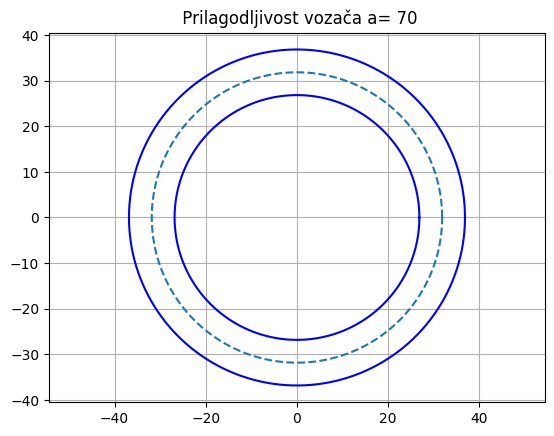

In [14]:
r = L / (2 * np.pi)  # poluprečnik kružnog puta
theta = np.linspace(0, 2 * np.pi, 500) #ravnomerno rasporedimo uglove
# uzimamo polarne koordinate
xk = np.cos(theta)
yk = np.sin(theta)

#inicijalizujemo figuru
fig, axis = plt.subplots()
#fig za postavljanje globalnih svojstava figure
#axis  za rad sa pojedinačnim grafikom (crtanje, dodavanje naslova, oznaka osi itd.)

#podesavanje grafika
axis.set_title(f" Prilagodljivost vozača a= {a}")
plt.axis('equal')
plt.plot(r * xk, r * yk, '--', label="staza kojom se krecu")
plt.plot((r + 5) * xk, (r + 5) * yk, 'b')
plt.plot((r - 5) * xk, (r - 5) * yk, 'b')
plt.grid(True)
plt.show()

Želim da postavim animaciju. U MATLAB-u animaciju obično pravimo korišćenjem funkcije pause(1). U Pythonu postoji slična mogućnost, ali prikaz preko standardnog Jupyter backenda u Google Colab okruženju nije dobar za animacije.
Osim toga, želim da generišem video koji će biti vidljiv u HTML-u, tako da ćemo koristiti matplotlib.animation.FuncAnimation, koji stabilno radi u Colab-u.

Kada smo to postavili, uključimo klasu **FuncAnimation** iz matplotlib biblioteke koja omogućava stvaranje animacija u Pythonu. Argumenti ove klase su:
- fig - figura na kojoj će se animacija prikazati,
- func - funkcija koja ažurira sadržaj grafika u svakoj iteraciji,
- frames - Broj frejmova (ili iterator) koji se koriste u animaciji,
- init_func (opciono) - funkcija za inicijalizaciju pre početka animacije,
- blit (opciono) - ako je vrednost True crta samo one delove grafika koji se menjaju
- interval (opciono) - vreme (u milisekundama) između frejmova.


In [15]:
#Animacija
from matplotlib.animation import FuncAnimation
animplot, = axis.plot([], [], 'o', markersize=12, color='blue')#grafički objekat koji će se menjati tokom animacije
#plot([], [], ...): Postavlja početne koordinate tačke na prazne vrednosti ([]) jer u početku nema podataka.


# Funkcija koja ažurira frejmove
def update_data(frame):
    x=uvj[frame][:N]
    animplot.set_data(r*np.cos(x/r),r*np.sin(x/r))  # Ažuriraj podatke
    return [animplot]

# Kreiranje animacije
anim = FuncAnimation(
    fig=fig,                   # pokazivac na figuru
    func=update_data,          # funkcija koja ažurira figuru, dodaje objekte na nju
    frames=range(0, len(uvj), 10),  #frames=len(uvj),            # Broj frejmova
    interval=50,               # Pauza između frejmova (ms)
    blit=True,                 # # blit=True re-draws only the parts that have changed.
    repeat=False               # Ne ponavljaj animaciju
)

# Prikazivanje animacije
plt.show()


In [19]:
# Prikazivanje animacije kao video u  HTML-u (ako je potrebno)
from IPython.display import HTML
HTML(anim.to_html5_video())

In [17]:
# ako zelimo sacuvati video:
anim.save("prati_vodju_70.mp4", writer="ffmpeg", fps=30)

Na ovom modelu možemo da primetimo da je on dinamički stabilan, odnosno da će sva vozila nakon izvesnog vremena voziti istom brzinom, iako smo svim vozilima u početnom trenutku dodelili različite brzine.

Primetimo da što je koeficijent prilagodljivosti vozača manji, to su vozila manje ravnomerno raspoređena:

In [18]:
from IPython.display import Video
Video("https://raw.githubusercontent.com/adelic-matf/MM/main/slike/prati_vodju_20.mp4")